In [233]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [234]:
headers = ['timestamp','message_identifier','sender','recipients','topic','mode']
df = pd.read_csv('data/enron-event-history-all.csv')
df.columns = headers
df.head()

,timestamp,message_identifier,sender,recipients,topic,mode
0,909790980000,<N5QXQ4CHS04FBSJO3TALWRBXATDTIWZ0B@zlsvr22>,mark legal taylor,Marc.R.Cutler@BankAmerica.com,NaN,email
1,909791760000,<FEJ0YLF5MHTTF2QHNWMRUODCCHDCPUA5A@zlsvr22>,mark legal taylor,Marc.R.Cutler@BankAmerica.com,NaN,email
2,909792120000,<NFC21LWTHYCKD4JV1IQMLSQ4JX2WY1JCB@zlsvr22>,mark legal taylor,shari stack,NaN,email
3,909795960000,<LAGJQ1MQZ2HX3APYD2TBODXUA4XF04UOA@zlsvr22>,mark legal taylor,Marc.R.Cutler@BankAmerica.com,NaN,email
4,910063920000,<OMETEF4XWA2X3AIQFPFAI1BA4JCP3NZEA@zlsvr22>,mark legal taylor,yao apasu,NaN,email


# Missing data

In [235]:
total_missing = df.isnull().sum().sort_values(ascending=False)
total_missing.head()

topic                 205730
recipients                38
sender                    32
mode                       0
message_identifier         0
dtype: int64

In [236]:
df['sender'].isnull().any().any()

True

### sender null values count

In [237]:
df[df['sender'].isnull()]

,timestamp,message_identifier,sender,recipients,topic,mode
28053,968214900000,<MV1ZKRPYOZDMZXWGA2LDYRWQ5NEDLRHUB@zlsvr22>,NaN,mcuilla,NaN,email
29697,969036060000,<ONW3FVMZZLCSYXWCUVDMV0T2XA2Z5WSYA@zlsvr22>,NaN,mcuilla,NaN,email
50429,976762380000,<AW42KOVJ0MLDY32HGJA2TSFVSABETB0HB@zlsvr22>,NaN,stuartp,NaN,email
57915,980454360000,<PUJZITF5YDT2T4VSMNOEPDPSYR2IQCVGA@zlsvr22>,NaN,john griffith,NaN,email
57963,980463180000,<CCHQUP5Q3VR1L2AVNPBAQGRRK4LLWALOA@zlsvr22>,NaN,jschwie,NaN,email
61127,981593760000,<N12PD11SYNEI5TBWZPMZXYOVXG0NGPG5A@zlsvr22>,NaN,don baughman,NaN,email
61810,981770760000,<AY1ZHNAO4GCEGOVR2T1FUNUVUWIVLUJVA@zlsvr22>,NaN,don baughman|debbie contreras,NaN,email
62737,982195680000,<OVESDNCSAEMQGI55E232TL2KYV3L2GETA@zlsvr22>,NaN,joe stepenovitch,NaN,email
63613,982692180000,<CK2CLPM322RSQ5N2R3LZ4UM0EMYDSIUWA@zlsvr22>,NaN,jane tholt,NaN,email
76041,986501520000,<N0O0HNJ3DQJPKYHHCWYM4HIDW1EMVVRTA@zlsvr22>,NaN,jane tholt,NaN,email


### Recipients null values

In [238]:
df[df['recipients'].isnull()]

,timestamp,message_identifier,sender,recipients,topic,mode
4770,947687460000,<GWRTH5VJUYVYQ3WRHACDSLBWSJDVUNZHB@zlsvr22>,announcements,NaN,NaN,email
8041,952028820000,<NVP5UPUQH430JMPDCGAXBZBLROIUSMWZA@zlsvr22>,ginger dernehl,NaN,NaN,email
8042,952028880000,<DNUYWCGFNMGH4FS43ER5X53S50KKBW4SB@zlsvr22>,ginger dernehl,NaN,NaN,email
10079,954467460000,<NG4RGGKJPIXOPE0WTNCOYZQ2BHVATBGOA@zlsvr22>,owner,NaN,NaN,email
10528,955047780000,<MVXLD0OH5QXEDD1YIPRGHVQKDE12OSRTB@zlsvr22>,owner,NaN,NaN,email
11760,956343420000,<DSZE5L2GSINHZACOYSXQHY2IKTGSS1OUA@zlsvr22>,owner,NaN,NaN,email
13573,958210320000,<CT4LXHTTHJSASSXAQWOLCHNP2M5KPOXLA@zlsvr22>,owner,NaN,NaN,email
23955,965826420000,<CNDRYE0PW2S5D40UVYPFII3WGHP4R51OB@zlsvr22>,office of,NaN,NaN,email
86233,988798200000,<GFLFC2TLX00HXYC0OTWFTJZ0RS5Q3WNNB@zlsvr22>,blank,NaN,NaN,email
93547,990595735000,<GC3XJOJS3KGEKI4CRLW3ESQHXRRJWGYUA@zlsvr22>,blank,NaN,NaN,email


In [239]:
cp = df.copy()
cp['sender'] = cp['sender'].fillna('unknown_sender')
cp['recipients'] = cp['recipients'].fillna('unknown_recipients')

In [240]:
cp.isnull().sum().sort_values(ascending=False)

topic                 205730
mode                       0
recipients                 0
sender                     0
message_identifier         0
timestamp                  0
dtype: int64

In [241]:
list_emails = []
for index, row in cp.iterrows():
    ts = datetime.fromtimestamp(int(row['timestamp'])/1000)
    recipients_list = list(set([r.strip() for r in str(row['recipients']).split('|')]))
    
    sender = str(row['sender']).strip()    
    obj = dict(
        timestamps=ts,
        message_identifier = row['message_identifier'],
        sender=sender,
        recipients=recipients_list
    )
    
    list_emails.append(obj)

In [243]:
list_emails

[{'timestamps': datetime.datetime(1998, 10, 31, 0, 43),
  'message_identifier': '<N5QXQ4CHS04FBSJO3TALWRBXATDTIWZ0B@zlsvr22>',
  'sender': 'mark legal taylor',
  'recipients': ['Marc.R.Cutler@BankAmerica.com']},
 {'timestamps': datetime.datetime(1998, 10, 31, 0, 56),
  'message_identifier': '<FEJ0YLF5MHTTF2QHNWMRUODCCHDCPUA5A@zlsvr22>',
  'sender': 'mark legal taylor',
  'recipients': ['Marc.R.Cutler@BankAmerica.com']},
 {'timestamps': datetime.datetime(1998, 10, 31, 1, 2),
  'message_identifier': '<NFC21LWTHYCKD4JV1IQMLSQ4JX2WY1JCB@zlsvr22>',
  'sender': 'mark legal taylor',
  'recipients': ['shari stack']},
 {'timestamps': datetime.datetime(1998, 10, 31, 2, 6),
  'message_identifier': '<LAGJQ1MQZ2HX3APYD2TBODXUA4XF04UOA@zlsvr22>',
  'sender': 'mark legal taylor',
  'recipients': ['Marc.R.Cutler@BankAmerica.com']},
 {'timestamps': datetime.datetime(1998, 11, 3, 4, 32),
  'message_identifier': '<OMETEF4XWA2X3AIQFPFAI1BA4JCP3NZEA@zlsvr22>',
  'sender': 'mark legal taylor',
  'recipients

### Count sender recipients

In [244]:
all_email_recipents = []
all_email_sender = []
for e in list_emails:
    all_email_recipents.append(e['recipients'])
    all_email_sender.append(e['sender'])

In [245]:
from collections import Counter
flat_all_email_recipents = [item for sublist in all_email_recipents for item in sublist]
recip_counts = Counter(flat_all_email_recipents)
sender_counts = Counter(all_email_sender)

In [246]:
sender_counts

Counter({'mark legal taylor': 519,
         'yao apasu': 4,
         'Heather J Mitchell AT ENRON_DEVELOPMENT@CCMAIL': 1,
         'anita fam': 3,
         'doug leach': 39,
         'Andrea Calo/ENRON_DEVELOPMENT AT ENRON_DEVELOPMENT@CCMAIL': 2,
         'scott sefton': 20,
         'michelle cash': 1639,
         'mark haedicke': 1101,
         'eticket@coair.com': 1,
         'brent hendry': 168,
         'paul simons': 59,
         'christian yoder': 96,
         'mtaylor': 4,
         'Paul Waine': 1,
         'mark elliott': 40,
         'deb korkmas': 34,
         'Brent Hendry AT ENRON_DEVELOPMENT@CCMAIL': 23,
         'www@dejanews.com': 1,
         'marc phillips': 16,
         'team kingman': 21,
         'team san': 6,
         'Michel E Nelson': 1,
         'george robinson': 45,
         'Leo F Nichols': 1,
         'Russ Ulibarri': 1,
         'jeffrey fawcett': 76,
         'rich jolly': 26,
         'louis soldano': 24,
         'david roensch': 40,
         'justin bo

In [247]:
all_person = set(flat_all_email_recipents + all_email_sender)

In [248]:
name_counts_list = [{'person': n,
                     'sent': sender_counts[n],
                     'received': recip_counts[n]} for n in all_person]

result_df = pd.DataFrame(name_counts_list)
result_sorted = result_df.sort_values('sent', ascending=False)

In [249]:
result_sorted.head()

,person,received,sent
36286,jeff dasovich,2249,5232
11374,sara shackleton,5217,4591
14822,pete davis,853,3898
3354,chris germany,1591,3703
2074,notes,1023,3314


In [250]:
result_sorted.to_csv('result.csv', index=False)

In [251]:
top_n_senders = list(result_sorted['person'].iloc[0:5])
top_n_senders

['jeff dasovich', 'sara shackleton', 'pete davis', 'chris germany', 'notes']

In [252]:
labels, values = zip(*sender_counts.most_common(5))

In [253]:
labels

('jeff dasovich', 'sara shackleton', 'pete davis', 'chris germany', 'notes')

In [254]:
result_sorted.head()

,person,received,sent
36286,jeff dasovich,2249,5232
11374,sara shackleton,5217,4591
14822,pete davis,853,3898
3354,chris germany,1591,3703
2074,notes,1023,3314


In [255]:
list_emails

[{'timestamps': datetime.datetime(1998, 10, 31, 0, 43),
  'message_identifier': '<N5QXQ4CHS04FBSJO3TALWRBXATDTIWZ0B@zlsvr22>',
  'sender': 'mark legal taylor',
  'recipients': ['Marc.R.Cutler@BankAmerica.com']},
 {'timestamps': datetime.datetime(1998, 10, 31, 0, 56),
  'message_identifier': '<FEJ0YLF5MHTTF2QHNWMRUODCCHDCPUA5A@zlsvr22>',
  'sender': 'mark legal taylor',
  'recipients': ['Marc.R.Cutler@BankAmerica.com']},
 {'timestamps': datetime.datetime(1998, 10, 31, 1, 2),
  'message_identifier': '<NFC21LWTHYCKD4JV1IQMLSQ4JX2WY1JCB@zlsvr22>',
  'sender': 'mark legal taylor',
  'recipients': ['shari stack']},
 {'timestamps': datetime.datetime(1998, 10, 31, 2, 6),
  'message_identifier': '<LAGJQ1MQZ2HX3APYD2TBODXUA4XF04UOA@zlsvr22>',
  'sender': 'mark legal taylor',
  'recipients': ['Marc.R.Cutler@BankAmerica.com']},
 {'timestamps': datetime.datetime(1998, 11, 3, 4, 32),
  'message_identifier': '<OMETEF4XWA2X3AIQFPFAI1BA4JCP3NZEA@zlsvr22>',
  'sender': 'mark legal taylor',
  'recipients

In [272]:
def gen_person_activity(person_name):
        emails_activity = []
        for e in list_emails:
            sent = 0
            received = 0
            sender_name = None

            if e['sender'] == person_name or person_name in e['recipients']:
                if e['sender'] == person_name:
                    sent = 1
                if person_name in e['recipients']:
                    received = 1
                    sender_name = e['sender']

                emails_activity.append({
                    'time_stamp': e['timestamps'],
                    'sent': sent,
                    'received': received,
                    'sender_name': sender_name,
                    'person_name': person_name
                })
        return pd.DataFrame(emails_activity).set_index('time_stamp')

In [273]:
df_jeff = gen_person_activity('jeff dasovich')

In [274]:
df_jeff.head()

,person_name,received,sender_name,sent
time_stamp,,,,
1999-09-21 05:21:00,jeff dasovich,1,Martin.Esarte@clorox.com,0
1999-09-21 05:38:00,jeff dasovich,1,hudacko,0
1999-09-21 15:38:00,jeff dasovich,1,mark mcclelland,0
1999-09-22 08:50:00,jeff dasovich,1,orders amazon,0
1999-09-23 06:37:00,jeff dasovich,1,orders amazon,0


In [329]:
def visualize_sent(top_persons):
    for _, p in enumerate(top_persons):
        p_activity = gen_person_activity(person_name=p)
        sent_agg = p_activity['sent'].groupby(pd.Grouper(freq='M')).sum()
        plt.plot(sent_agg.index, sent_agg.values, label=p)
        plt.title('Number of emails sent every month')
        plt.grid(True)
        plt.xlabel("Unix Time (month)")
        plt.ylabel("Number of emails")
        plt.legend(loc=2, borderaxespad=0.,frameon=False)
        plt.savefig('requirement_2.png', format='png',dpi=200)
def visualize_received(top_persons):
    for _, p in enumerate(top_persons):
        p_activity = gen_person_activity(person_name=p)
        received_from_unique_agg = p_activity['sender_name'].groupby(pd.Grouper(freq='M')).nunique()
        plt.plot(received_from_unique_agg,label=p)
        plt.title('Number of unique senders every month')
        plt.grid(True)
        plt.xlabel('Unix Time (month)')
        plt.ylabel('Number of unique senders')
        plt.legend(loc=2, borderaxespad=0.,frameon=False)
        plt.savefig('requirement_3.png', format='png',dpi=200)

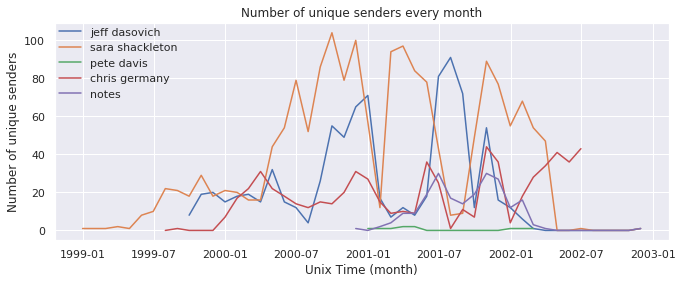

In [330]:
visualize_received(top_n_senders)

In [275]:
p_activity = df_jeff
sent_agg = p_activity['sent'].groupby(pd.Grouper(freq='M')).sum()
received_from_unique_agg = p_activity['sender_name'].groupby(pd.Grouper(freq='M')).nunique()

<Figure size 432x288 with 0 Axes>

In [278]:
sent_agg.index

DatetimeIndex(['1999-09-30', '1999-10-31', '1999-11-30', '1999-12-31',
               '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31', '2000-11-30', '2000-12-31',
               '2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31', '2001-11-30', '2001-12-31',
               '2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31', '2002-11-30'],
              dtype='datetime64[ns]', name='time_stamp', freq='M')

In [280]:
sent_agg.values

array([  0,   1,   0,   0,   1,   0,   0,   1,   1,   1,   1,  87, 347,
       333, 374, 289, 293, 382, 470, 511, 386, 152, 427, 110, 434, 588,
        33,   8,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [281]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

/home/hieuiph/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/hieuiph/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/hieuiph/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/hieuiph/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


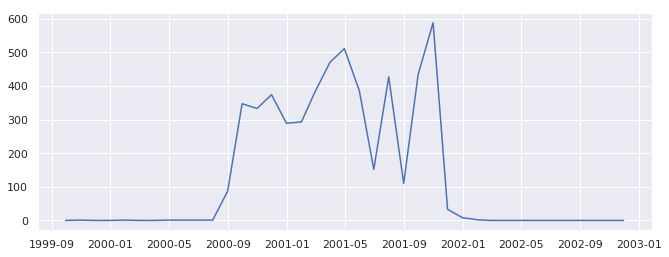

In [285]:
plt.plot(sent_agg.index, sent_agg.values)